
# March Madness Match Predictor
Authors: Peter Chacko (pic282), Imran Hussein (ih5296) Ethan Lopez (esl834),
Bidhan Devkota (bd25229)

## Introduction
What is the machine learning problem you are trying to solve:

Each year, the NCAA Men's College Basketball tournament (March Madness) gathers excitement and speculation from fans. Both casual and hard-core basketball fans compete to predict the outcome of each match, which frequently results in upsets. Our machine learning project aims to predict the outcome of a March Madness matchup using the data found on Kaggle.
 
*Why does the problem matter?*
 
 Every year, thousands of people submit their tournament bracket predictions toof our predictive model could be used for creating bracket challenges as basketball fans compete against each other in predicting the outcomes of each  contests for chances to win big prizes and bragging rights. At this point it has become college basketball culture and people take it very seriously. From the casual perspective, where people pick winners based on their favorite mascot, to more serious analytical perspectives where people leverage statistical patterns - we thought it would be interesting to take a machine learning approach. 
 
*What could the results of your predictive model be used for?*

The most obvious and satisfying result of creating a March Madness matchup predictor is to leverage Big Data and machine learning against friends and family mock brackets.
   
*Then describe the dataset that you will use to tackle this problem.*

The [Kaggle March Madness Dataset](https://www.kaggle.com/datasets/nishaanamin/march-madness-data) has a plethora of data split across multiple files:

- 2023 Conference Data.csv
  - This dataset features the conferences and their stats from the 2022 - 2023 season. All of the stats given represent the average stats of the conference throughout the entire season including the conference tournaments. It also features how well each conference did in the tournament by featuring how many teams in that conference made it to the specific rounds as well.
- 2023 Game Data.csv
  - This dataset features several potential matchups for the 2023 tournament. It includes all First Round matchups, common Second Round matchups, and common Sweet 16 matchups. This dataset was created to predict the results of these specific matchups in my March Madness notebook. Every two rows represent a matchup. For example, the first two rows (Alabama and Grambling) represent a matchup between the two teams. The subsequent rows (Alabama and Howard) represent a matchup between another two teams and so on. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament.

- 2023 Tournament Data.csv
  - This dataset features the teams and their stats for the 2023 tournament. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament.


- 2023 Tournament Trends.csv
  - This dataset features the teams and some specific stats for the 2023 tournament teams. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament. The Points Per Game, Win % (Close Games), Away Win %, Neutral Win %, Away - Neutral Win %, and Scoring Margin stats pertain to the 2023 teams that are the top 11 seeds. The BADJ O Rank Difference and BADJ D Rank Difference pertain to the 2023 teams that have a differential of 30 or greater for offense / defense. The TOV % and TOV % Rank pertain to the 2023 teams that have a TOV % greater than or equal to 18 %. The 3PT % and 3PT % Defense pertain to the 2023 teams that shoot 33 % or below from 3.
  
- Game Data.csv
  - This dataset features the boxscores of all games since 2008 (including 2023). This includes the non-conference games, the conference games, the conference tournament games, and the national tournament games.

- Tournament Conference Data.csv
  - This dataset features the conferences and their stats from all tournaments since 2008. All of the stats given represent the average stats of the conference throughout the entire season including the conference tournaments. It also features how well each conference did in the tournament by featuring how many teams in that conference made it to the specific rounds as well.

- Tournament Game Data.csv
  - This dataset features several potential matchups for the 2023 tournament. It includes all First Round matchups, common Second Round matchups, and common Sweet 16 matchups. This dataset was created to predict the results of these specific matchups in my March Madness notebook. Every two rows represent a matchup. For example, the first two rows (Alabama and Grambling) represent a matchup between the two teams. The subsequent rows (Alabama and Howard) represent a matchup between another two teams and so on. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament.
  
  
- Tournament Game Data.csv
  - This dataset features several potential matchups for past tournaments since 2008. It includes all First Round matchups, common Second Round matchups, and common Sweet 16 matchups. This dataset was created to predict the results of these specific matchups in my March Madness notebook. Every two rows represent a matchup. For example, the first two rows (Gonzaga and Georgia St.) represent a matchup between the two teams. The subsequent rows (Boise St. and Memphis) represent a matchup between another two teams and so on. All of the stats given represent the average stats of the team throughout the entire season including their conference tournament. 

Unfortunately, the only data file that we could feasibly use was the Tournament Game Data file. We ultimately decided that previous tournament outcomes would be most valuable in predicting future tournament outcomes. Also, a lot of data was missing from various other files and would have been useless without a complete dataset. (We explored this removed them from the notebook to remove clutter as there are a lot of different files)

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We begin our process by doing some basic data exploration on the previous tournament game data - loading in the csv files, counting records, and checking for null values.

In [80]:
tournament_game_data_2023 = pd.read_csv("data/Tournament Game Data.csv", na_values=[r'?'])
print(tournament_game_data_2023.head())

   YEAR  SEED         TEAM  TEAM ROUND  CURRENT ROUND  \
0  2022     1      Gonzaga          16             64   
1  2022    16  Georgia St.          64             64   
2  2022     8    Boise St.          64             64   
3  2022     9      Memphis          32             64   
4  2022     5  Connecticut          64             64   

   KENPOM ADJUSTED EFFICIENCY  KENPOM ADJUSTED OFFENSE  \
0                        33.0                    121.8   
1                         1.8                    101.5   
2                        16.4                    108.4   
3                        16.2                    110.4   
4                        19.3                    113.9   

   KENPOM ADJUSTED DEFENSE  KENPOM ADJUSTED TEMPO  \
0                     88.8                   72.5   
1                     99.7                   67.1   
2                     92.0                   64.6   
3                     94.1                   70.3   
4                     94.6                 

After the above cell is run, we start to see the format in which the previous tournament game data is structured. Singular game data is represented by two rows, where each row has data on a participating team. In the head, we see that the first game is between Gonzaga (row 0) and Georgia St (row 1). Even the outcome is split up in the form of team 1 score and team 2 score - each existing on their dedicated row.

In [81]:
print("Tournamnet Data Record Count")
print(tournament_game_data_2023.shape)

print("Tournament Data Null Values:")
print(tournament_game_data_2023.isnull().sum().max())

Tournamnet Data Record Count
(1910, 44)
Tournament Data Null Values:
0


This dataset is already complete in that it has 0 null values. The total dataset includes 1910 records, with 44 attributes. 

However, we do not want to feed in multiple records as single inputs to our model. We will have to feature engineer the data, to stitch together every two rows in order to transform them into singular records that have data associated with single games. Effectively, this will result in the data having 955 games (rows), with 88 attributes.

Interestingly enough, we have identified the opportunity for a class imbalance. In the current way that the data is structured, team 1 will always be a higher seed and there will be a lot more team 1s with wins over team 2. Our original goal with our model wasn't to be able to accurately predict only upsets - rather we wanted to take in the attributes of two teams in order to determine a winner.

In order to help balance this out, we will alternate team assignments between team 1 and 2.

In [82]:
# Combine every game into a single record
tournament_game_matchups = pd.DataFrame()
for i, group in tournament_game_data_2023.groupby(tournament_game_data_2023.index // 2):
    # Alternate team assignments
    if i % 2 == 0:
        game = group.iloc[0].append(group.iloc[1])
        tournament_game_matchups = tournament_game_matchups.append(game, ignore_index=True)
    else:
        game = group.iloc[1].append(group.iloc[0])
        tournament_game_matchups = tournament_game_matchups.append(game, ignore_index=True)

# Print the head of the new dataframe
print(tournament_game_matchups)
# Print the shape of the new dataframe, should be double columns half the rows
print(tournament_game_matchups.shape)

     YEAR  SEED           TEAM  TEAM ROUND  CURRENT ROUND  \
0    2022     1        Gonzaga          16             64   
1    2022     9        Memphis          32             64   
2    2022     5    Connecticut          64             64   
3    2022    13        Vermont          64             64   
4    2022     6        Alabama          64             64   
..    ...   ...            ...         ...            ...   
950  2023     1         Kansas           0              0   
951  2023     5  San Diego St.           0              0   
952  2023     1         Purdue           0              0   
953  2023     5       Miami FL           0              0   
954  2023     1         Kansas           0              0   

     KENPOM ADJUSTED EFFICIENCY  KENPOM ADJUSTED OFFENSE  \
0                       33.0000                  121.800   
1                       16.2000                  110.400   
2                       19.3000                  113.900   
3                       13.

After running the cell above, we see that our efforts were successful. The shape of our dataset is now 955 x 88.


However, now we have double of each statistic and the column names are identical. Therefore, must do some basic data cleaning.

Firstly, we should make the first 44 rows (the number of features per team) specify team 1, and the other team 2

In [83]:
tournament_game_matchups.rename(columns={"TEAM.1": "TEAM"}, inplace=True)
for i, col_name in enumerate(tournament_game_matchups.columns):
    if i < 44:
        tournament_game_matchups.columns.values[i] = tournament_game_matchups.columns.values[i].replace(" (TEAM 1)", "") + " (TEAM 1)"
    else: 
        tournament_game_matchups.columns.values[i] = tournament_game_matchups.columns.values[i].replace(" (TEAM 2)", "") + " (TEAM 2)"

print(tournament_game_matchups.columns)

Index(['YEAR (TEAM 1)', 'SEED (TEAM 1)', 'TEAM (TEAM 1)',
       'TEAM ROUND (TEAM 1)', 'CURRENT ROUND (TEAM 1)',
       'KENPOM ADJUSTED EFFICIENCY (TEAM 1)',
       'KENPOM ADJUSTED OFFENSE (TEAM 1)', 'KENPOM ADJUSTED DEFENSE (TEAM 1)',
       'KENPOM ADJUSTED TEMPO (TEAM 1)',
       'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)',
       'BARTTORVIK ADJUSTED OFFENSE (TEAM 1)',
       'BARTTORVIK ADJUSTED DEFENSE (TEAM 1)', 'BARTHAG (TEAM 1)',
       'ELITE SOS (TEAM 1)', 'BARTTORVIK ADJUSTED TEMPO (TEAM 1)',
       '2PT % (TEAM 1)', '3PT % (TEAM 1)', 'FREE THROW % (TEAM 1)',
       'EFG % (TEAM 1)', 'FREE THROW RATE (TEAM 1)', '3PT RATE (TEAM 1)',
       'ASSIST % (TEAM 1)', 'OFFENSIVE REBOUND % (TEAM 1)',
       'DEFENSIVE REBOUND % (TEAM 1)', 'BLOCK % (TEAM 1)',
       'TURNOVER % (TEAM 1)', '2PT % DEFENSE (TEAM 1)',
       '3PT % DEFENSE (TEAM 1)', 'FREE THROW % DEFENSE (TEAM 1)',
       'EFG % DEFENSE (TEAM 1)', 'FREE THROW RATE DEFENSE (TEAM 1)',
       '3PT RATE DEFENSE (TEAM 1)', '


Now, there exist some duplicate and redundant values such as TEAM, YEAR, TEAM ROUND, ID. We do not want TEAM ROUND - the last round the team has played in - to be a factor in our input data as it is impossible to compute that as all games are concurrent. As for TEAM, YEAR, and ID - those should not necessarily have an impact on the outcome of the game, so we will drop them from our dataset.

In [84]:
dropped_columns = ['YEAR (TEAM 1)', 'TEAM (TEAM 1)',
                    'TEAM ROUND (TEAM 1)', 'ID (TEAM 1)',
                    'TEAM (TEAM 1)',
                    'YEAR (TEAM 2)', 'TEAM (TEAM 2)',
                    'TEAM ROUND (TEAM 2)', 'ID (TEAM 2)',
                    'TEAM (TEAM 2)']
tournament_game_matchups = tournament_game_matchups.drop(columns=dropped_columns)

print(tournament_game_matchups.columns)

Index(['SEED (TEAM 1)', 'CURRENT ROUND (TEAM 1)',
       'KENPOM ADJUSTED EFFICIENCY (TEAM 1)',
       'KENPOM ADJUSTED OFFENSE (TEAM 1)', 'KENPOM ADJUSTED DEFENSE (TEAM 1)',
       'KENPOM ADJUSTED TEMPO (TEAM 1)',
       'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)',
       'BARTTORVIK ADJUSTED OFFENSE (TEAM 1)',
       'BARTTORVIK ADJUSTED DEFENSE (TEAM 1)', 'BARTHAG (TEAM 1)',
       'ELITE SOS (TEAM 1)', 'BARTTORVIK ADJUSTED TEMPO (TEAM 1)',
       '2PT % (TEAM 1)', '3PT % (TEAM 1)', 'FREE THROW % (TEAM 1)',
       'EFG % (TEAM 1)', 'FREE THROW RATE (TEAM 1)', '3PT RATE (TEAM 1)',
       'ASSIST % (TEAM 1)', 'OFFENSIVE REBOUND % (TEAM 1)',
       'DEFENSIVE REBOUND % (TEAM 1)', 'BLOCK % (TEAM 1)',
       'TURNOVER % (TEAM 1)', '2PT % DEFENSE (TEAM 1)',
       '3PT % DEFENSE (TEAM 1)', 'FREE THROW % DEFENSE (TEAM 1)',
       'EFG % DEFENSE (TEAM 1)', 'FREE THROW RATE DEFENSE (TEAM 1)',
       '3PT RATE DEFENSE (TEAM 1)', 'OP ASSIST % (TEAM 1)',
       'OP O REB % (TEAM 1)', 'OP D REB %


#### Creating Label
We have another issue, we do not want our label to be the score; however, instead, we want
which team was the winner: Team 1 or Team 2

Instead of score, we will replace column with 0 if team 1 won or 1 if team 2 won.

In [85]:
tournament_game_matchups['RESULT'] = ''

for i, row in tournament_game_matchups.iterrows():
    if row["SCORE (TEAM 1)"] > row["SCORE (TEAM 2)"]:
        tournament_game_matchups.loc[i, 'RESULT'] = 0
    else:
        tournament_game_matchups.loc[i, 'RESULT'] = 1

print(tournament_game_matchups.head())

   SEED (TEAM 1)  CURRENT ROUND (TEAM 1)  KENPOM ADJUSTED EFFICIENCY (TEAM 1)  \
0              1                      64                                 33.0   
1              9                      64                                 16.2   
2              5                      64                                 19.3   
3             13                      64                                 13.1   
4              6                      64                                 17.4   

   KENPOM ADJUSTED OFFENSE (TEAM 1)  KENPOM ADJUSTED DEFENSE (TEAM 1)  \
0                             121.8                              88.8   
1                             110.4                              94.1   
2                             113.9                              94.6   
3                             110.8                              97.7   
4                             116.1                              98.7   

   KENPOM ADJUSTED TEMPO (TEAM 1)  BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)

In our actual training data, we do not want the scores to be accounted for, as it will not be part of our predictive data. We will also drop those columns.

In [86]:
tournament_game_matchups = tournament_game_matchups.drop(columns=['SCORE (TEAM 1)', 'SCORE (TEAM 2)'])
print(tournament_game_matchups.columns)

Index(['SEED (TEAM 1)', 'CURRENT ROUND (TEAM 1)',
       'KENPOM ADJUSTED EFFICIENCY (TEAM 1)',
       'KENPOM ADJUSTED OFFENSE (TEAM 1)', 'KENPOM ADJUSTED DEFENSE (TEAM 1)',
       'KENPOM ADJUSTED TEMPO (TEAM 1)',
       'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)',
       'BARTTORVIK ADJUSTED OFFENSE (TEAM 1)',
       'BARTTORVIK ADJUSTED DEFENSE (TEAM 1)', 'BARTHAG (TEAM 1)',
       'ELITE SOS (TEAM 1)', 'BARTTORVIK ADJUSTED TEMPO (TEAM 1)',
       '2PT % (TEAM 1)', '3PT % (TEAM 1)', 'FREE THROW % (TEAM 1)',
       'EFG % (TEAM 1)', 'FREE THROW RATE (TEAM 1)', '3PT RATE (TEAM 1)',
       'ASSIST % (TEAM 1)', 'OFFENSIVE REBOUND % (TEAM 1)',
       'DEFENSIVE REBOUND % (TEAM 1)', 'BLOCK % (TEAM 1)',
       'TURNOVER % (TEAM 1)', '2PT % DEFENSE (TEAM 1)',
       '3PT % DEFENSE (TEAM 1)', 'FREE THROW % DEFENSE (TEAM 1)',
       'EFG % DEFENSE (TEAM 1)', 'FREE THROW RATE DEFENSE (TEAM 1)',
       '3PT RATE DEFENSE (TEAM 1)', 'OP ASSIST % (TEAM 1)',
       'OP O REB % (TEAM 1)', 'OP D REB %

### Data Exploration

Now a lot of our simple data cleaning and feature engineering has been done, let's do some data exploration.
Lets explore some trends in overall tournament winners

First, we will plot winners (overall) adjusted offense/adjusted defense ratings. The brighter the red, the farther round was won. From the scatter plot, we couldn't see a major trend.

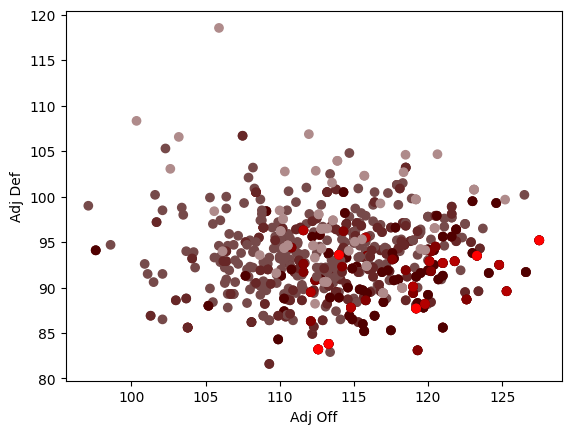

In [87]:
team1_b_adj_off = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), "BARTTORVIK ADJUSTED OFFENSE (TEAM 1)"].tolist()
team2_b_adj_off = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), "BARTTORVIK ADJUSTED OFFENSE (TEAM 2)"].tolist()
winners_b_adj_off = team1_b_adj_off + team2_b_adj_off

team1_b_adj_def = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), "BARTTORVIK ADJUSTED DEFENSE (TEAM 1)"].tolist()
team2_b_adj_def = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), "BARTTORVIK ADJUSTED DEFENSE (TEAM 2)"].tolist()
winners_b_adj_def = team1_b_adj_def + team2_b_adj_def

team1_round = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), "CURRENT ROUND (TEAM 1)"].tolist()
team2_round = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), "CURRENT ROUND (TEAM 2)"].tolist()
winners_round = team1_round + team2_round


# Set up plotting by colors
colors = { 0:"#af8b8b", 64: "#764a4a", 32: "#672727", 16: "#500000", 8: "#840000", 4: "#b40000", 2: "#ff0000"}
round_colors = [colors[round] for round in winners_round]

# Now we plot
plt.scatter(winners_b_adj_off, winners_b_adj_def, c=round_colors)
plt.xlabel("Adj Off")
plt.ylabel("Adj Def")
plt.show()


When we plot winners (overall) effeciency ratings, we find a much stronger trend.

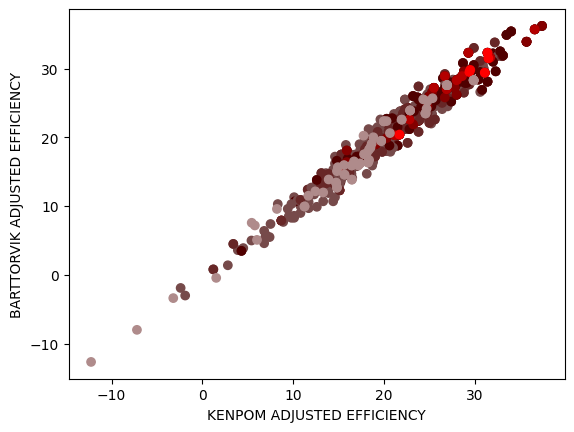

In [88]:
team1_adj_eff_k = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'KENPOM ADJUSTED EFFICIENCY (TEAM 1)'].tolist()
team2_adj_eff_k = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'KENPOM ADJUSTED EFFICIENCY (TEAM 2)'].tolist()
winners_adj_eff_k = team1_adj_eff_k + team2_adj_eff_k

team1_adj_eff_b = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)'].tolist()
team2_adj_eff_b = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 2)'].tolist()
winners_adj_eff_b = team1_adj_eff_b + team2_adj_eff_b

# Now we plot
plt.scatter(winners_adj_eff_k, winners_adj_eff_b, c=round_colors)
plt.xlabel("KENPOM ADJUSTED EFFICIENCY")
plt.ylabel("BARTTORVIK ADJUSTED EFFICIENCY")
plt.show()


Suprisingly, when we plot turnover and turnover defense we didn't see a strong correlation. (We were prompted to explore this because of a TikTok seen during the actually play through of the tournament this year, where one insisted a correlation between teams still in the tournament and their turnover statistics)

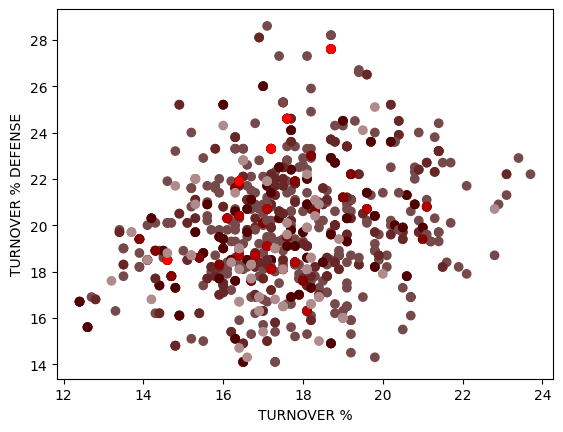

In [89]:
team1_turnover_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'TURNOVER % (TEAM 1)'].tolist()
team2_turnover_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'TURNOVER % (TEAM 2)'].tolist()
winners_turnover_percentage = team1_turnover_percentage + team2_turnover_percentage

team1_turnover_defensive_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 0, True, False), 'TURNOVER % DEFENSE (TEAM 1)'].tolist()
team2_turnover_defensive_percentage = tournament_game_matchups.loc[np.where(tournament_game_matchups["RESULT"] == 1, True, False), 'TURNOVER % DEFENSE (TEAM 2)'].tolist()
winners_turnover_defensive_percentage = team1_turnover_defensive_percentage + team2_turnover_defensive_percentage

# Now we plot
plt.scatter(winners_turnover_percentage, winners_turnover_defensive_percentage, c=round_colors)
plt.xlabel("TURNOVER %")
plt.ylabel("TURNOVER % DEFENSE")
plt.show()


We see when overall tournament winners were ranked in seeding using a bar graph that number one seeds were very frequently 1 seeds.

[1, 1, 1, 2, 1, 7, 1, 1, 1, 1, 1, 3, 1, 1]


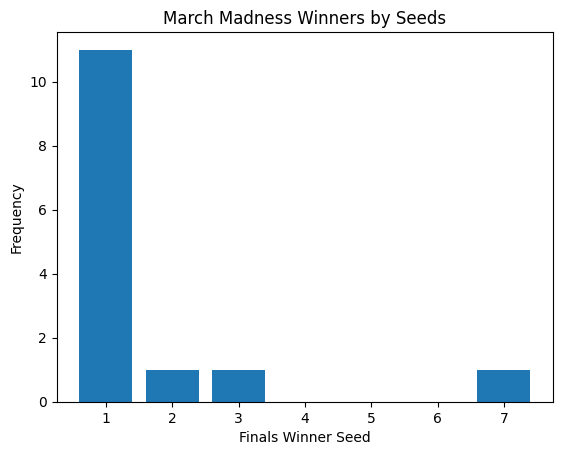

In [90]:
final_games = tournament_game_matchups[tournament_game_matchups["CURRENT ROUND (TEAM 1)"] == 2]

team1_seed = final_games.loc[np.where(final_games["RESULT"] == 0, True, False), 'SEED (TEAM 1)'].tolist()
team2_seed = final_games.loc[np.where(final_games["RESULT"] == 1, True, False), 'SEED (TEAM 2)'].tolist()
finals_winners_seeds = team1_seed + team2_seed

print(finals_winners_seeds)

# Use the "count" method of lists to count the frequency of each integer
counts = [finals_winners_seeds.count(i) for i in range(min(finals_winners_seeds), max(finals_winners_seeds)+1)]

# Create a bar graph with the frequency counts
plt.bar(range(min(finals_winners_seeds), max(finals_winners_seeds)+1), counts)
plt.xlabel('Finals Winner Seed')
plt.ylabel('Frequency')
plt.title('March Madness Winners by Seeds')
plt.show()

### Testing Models

We will now set up our x and y data in order to feed them into our evaluations of various models.

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

y_data = tournament_game_matchups['RESULT'].astype(int)
x_data = tournament_game_matchups.drop(['RESULT'],axis=1)

### Decision Tree Classifier

We begin with a decision tree classifier, where we hyper-tune our model with pca n-components, class_weight, max_depth, min_samples_leaf and max_features. With our pipeline featuring scaling, pca, and finally our decision tree.

In [68]:
# Confusion matrix stuff
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import  precision_recall_fscore_support
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with the cost matrix
clf = DecisionTreeClassifier()
weights = np.linspace(0.05, 0.95, 20)
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', clf)
])

param_grid = {
    'pca__n_components': list(range(3,6)),
    'clf__class_weight' : [{0: x, 1: 1.0-x} for x in weights],
    "clf__max_depth": [5,10,15,20] , 
    "clf__min_samples_leaf": [5,10,15,20],
    "clf__max_features" : [5,10,15]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_data, y_data)
print(grid_search.best_params_)

nested_score = cross_val_score(grid_search, x_data, y_data, cv=5)
print("Accuracy:", nested_score.mean()*100)

{'clf__class_weight': {0: 0.5710526315789474, 1: 0.42894736842105263}, 'clf__max_depth': 5, 'clf__max_features': 15, 'clf__min_samples_leaf': 15, 'pca__n_components': 5}
Accuracy: 62.30366492146597


We see that our class weights are relatively equal, with the best max depth being 5, max features being 10, min samples to form a leaf being 15, and the best n_components to be 5. The cross validation score for our decision tree model is 62.3%

### Random Forest

We now will run Random Forest, where we will hyper-tune pca n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features.  With our pipeline featuring scaling, pca, and finally our random forests.

In [33]:
from sklearn.ensemble import RandomForestClassifier
# Try a random forest
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [5, 10, 15],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2']
}

rfc = RandomForestClassifier()
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([
    ('scaler', scaler),
    ('clf', rfc)
])

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_data, y_data)
print("Best Hyperparameters: ", grid_search.best_params_)

cv_scores = cross_val_score(grid_search, x_data, y_data, cv=5)

print("Cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Best Hyperparameters:  {'clf__max_depth': 5, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Cross-validation accuracy: 64.29%


The best parameters from our random forest hypertuning were a max_depth of 5, max_features with log2, min_samples to form a leaf of 4, min_samples_split of 2 and n_estimators of 100. Our cross validation accuracy was 64.29%.

### Logistic Regression

Next we try Logistic Regression, a common variation on linear regession, where we hypertune our parameters with penalty, C value, and solver.

In [34]:
# Logistic Regression
clf = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', clf)
])

param_grid = [
    {   
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear']
    },
    {
        'clf__penalty': ['l2'],
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'clf__solver': ['lbfgs']
    }
]

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_data, y_data)
print("Best Hyperparameters: ", grid_search.best_params_)

cv_scores = cross_val_score(grid_search, x_data, y_data, cv=5)
print("Cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Best Hyperparameters:  {'clf__C': 0.001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Cross-validation accuracy: 68.27%


As a result of hypertuning our logistic regression model, we find the best parameters listed above. It performed with an average accuracy of 68.27%.

### SVM

Up next, we try using an SVM. We decided to hyper-tune our SVM with C value, kernel, degree, gamma, class_weight, max_iter and tol values. We see that this models performs with a accuracy of 68.27%.

In [38]:
#SVM Code
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore",category=ConvergenceWarning)


clf = SVC()
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', clf)
])

param_grid = {
    'clf__C': [0.1, 1, 10],       
    'clf__kernel': ['linear', 'rbf', 'poly'], 
    'clf__degree': [2, 3, 4], 
    'clf__gamma': [0.01, 0.1, 1, 'scale'], 
    'clf__class_weight': [None, 'balanced'], 
    'clf__max_iter': [1000, 5000, 10000],
    'clf__tol': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_data, y_data)
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__max_iter': 1000, 'clf__tol': 0.001}


In [ ]:
cv_scores = cross_val_score(grid_search, x_data, y_data, cv=5)
print("Cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Cross-validation accuracy: 60.94%


As a result of hyper-tuning our SVM, we find that the best hyperparameters (although a lot are listed above). This model had a cross validation score of 60.94%

### Neural Networks

Next we try implementing a Neural Network, hypertuning it with pca n_components and NN hidden layer sizes, alpha value, activation type and max_iter.

In [ ]:
# Neural Networks
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)
clf = MLPClassifier()
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', clf)
])

param_grid = {
    'pca__n_components': [2, 3],
    'clf__hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'clf__alpha': [0.0001, 0.001, 0.01],
    'clf__activation': ['logistic', 'tanh', 'relu'],
    'clf__max_iter': [200, 500, 1000]
}


grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_data, y_data)
print("Best Hyperparameters: ", grid_search.best_params_)

cv_scores = cross_val_score(grid_search, x_data, y_data, cv=5)
print("Cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Best Hyperparameters:  {'clf__activation': 'tanh', 'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (10,), 'clf__max_iter': 1000, 'pca__n_components': 2}
Cross-validation accuracy: 67.54%


The result of our hypertuning is listed above, with the accuracy of our model being 67.54%.

### KNN

Lastly, we try KNN. We don't really see a KNN opportunity at face value, but we decided to give it a shot either way. Here we hypertune it somewhat simple, with pca n_components, n_neighbors, weights, and p value.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
scaler = StandardScaler()
pca = PCA()
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('knn', knn)
])

param_grid = {
    'pca__n_components': range(3, 40),
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_data, y_data)
print("Best Hyperparameters: ", grid_search.best_params_)

cv_scores = cross_val_score(grid_search, x_data, y_data, cv=5)
print("Cross-validation accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Best Hyperparameters:  {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 13}
Cross-validation accuracy: 62.93%


The result of our hypertuning is listed about with the accuracy being below average, compared to the previous with an accuracy of 62.93%.

#### Selecting the best performing model

Our best performing model was Logistic Regression, so we will use that to make our 2023 predictions.

### Testing our model with the 2023 March Madness Tournament

Now we will begin forming our predictive bracket using our model to determine outcomes. 

The data provided for the 2023 tournament did not order the games as was in the previous tournaments game data was, so we had to take the 2023 Tournament Data csv and fix the ordering correctly to portray the first round matchups, this resulted in the 2023MarchMadnessTournament csv file.

We also have to perform a lot of the same data cleaning / feature engineering that we did previously to the other csv file. First, we will start by stitching the games together.

In [ ]:
# Start fixing the current march madness data
march_madness_bracket_2023 = pd.read_csv("data/2023MarchMadnessTournament.csv", na_values=[r'?'])
print(march_madness_bracket_2023.head())

march_madness_matchups = pd.DataFrame()
for i, group in march_madness_bracket_2023.groupby(march_madness_bracket_2023.index // 2):
    game = group.iloc[0].append(group.iloc[1])
    march_madness_matchups  = march_madness_matchups.append(game, ignore_index=True)

# Print the head of the new dataframe
print(march_madness_matchups)
# Print the shape of the new dataframe, should be double columns half the rows
print(march_madness_matchups.shape)

   YEAR  SEED                    TEAM  TEAM ROUND  CURRENT ROUND  \
0  2023     1                 Alabama           0              0   
1  2023    16  Texas A&M Corpus Chris           0              0   
2  2023     8                Maryland           0              0   
3  2023     9           West Virginia           0              0   
4  2023     5           San Diego St.           0              0   

   KENPOM ADJUSTED EFFICIENCY  KENPOM ADJUSTED OFFENSE  \
0                     26.9363                  115.832   
1                     -0.2012                  107.470   
2                     18.3612                  114.182   
3                     19.1450                  117.222   
4                     20.2804                  112.035   

   KENPOM ADJUSTED DEFENSE  KENPOM ADJUSTED TEMPO  \
0                  88.8960                72.7700   
1                 107.6710                69.2125   
2                  95.8207                64.5777   
3                  98.0770    

Now, we need to make the distiction between TEAM 1 and TEAM 2

In [ ]:
march_madness_matchups.rename(columns={"TEAM.1": "TEAM"}, inplace=True)
for i, col_name in enumerate(march_madness_matchups.columns):
    if i < 42:
        march_madness_matchups.columns.values[i] = march_madness_matchups.columns.values[i].replace(" (TEAM 1)", "") + " (TEAM 1)"
    else: 
        march_madness_matchups.columns.values[i] = march_madness_matchups.columns.values[i].replace(" (TEAM 2)", "") + " (TEAM 2)"

print(march_madness_matchups.columns)
print(march_madness_matchups.shape)

Index(['YEAR (TEAM 1)', 'SEED (TEAM 1)', 'TEAM (TEAM 1)',
       'TEAM ROUND (TEAM 1)', 'CURRENT ROUND (TEAM 1)',
       'KENPOM ADJUSTED EFFICIENCY (TEAM 1)',
       'KENPOM ADJUSTED OFFENSE (TEAM 1)', 'KENPOM ADJUSTED DEFENSE (TEAM 1)',
       'KENPOM ADJUSTED TEMPO (TEAM 1)',
       'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)',
       'BARTTORVIK ADJUSTED OFFENSE (TEAM 1)',
       'BARTTORVIK ADJUSTED DEFENSE (TEAM 1)', 'BARTHAG (TEAM 1)',
       'ELITE SOS (TEAM 1)', 'BARTTORVIK ADJUSTED TEMPO (TEAM 1)',
       '2PT % (TEAM 1)', '3PT % (TEAM 1)', 'FREE THROW % (TEAM 1)',
       'EFG % (TEAM 1)', 'FREE THROW RATE (TEAM 1)', '3PT RATE (TEAM 1)',
       'ASSIST % (TEAM 1)', 'OFFENSIVE REBOUND % (TEAM 1)',
       'DEFENSIVE REBOUND % (TEAM 1)', 'BLOCK % (TEAM 1)',
       'TURNOVER % (TEAM 1)', '2PT % DEFENSE (TEAM 1)',
       '3PT % DEFENSE (TEAM 1)', 'FREE THROW % DEFENSE (TEAM 1)',
       'EFG % DEFENSE (TEAM 1)', 'FREE THROW RATE DEFENSE (TEAM 1)',
       '3PT RATE DEFENSE (TEAM 1)', '

Here, we remove duplicate and unnecessary values.

In [ ]:

dropped_columns = ['YEAR (TEAM 1)', 'TEAM (TEAM 1)', 'TEAM ROUND (TEAM 1)', 'TEAM (TEAM 1)',
                   'YEAR (TEAM 2)', 'TEAM (TEAM 2)', 'TEAM ROUND (TEAM 2)', 'TEAM (TEAM 2)']

march_madness_matchups = march_madness_matchups.drop(columns=dropped_columns)
print(march_madness_matchups.columns)
print(march_madness_matchups.shape)

Index(['SEED (TEAM 1)', 'CURRENT ROUND (TEAM 1)',
       'KENPOM ADJUSTED EFFICIENCY (TEAM 1)',
       'KENPOM ADJUSTED OFFENSE (TEAM 1)', 'KENPOM ADJUSTED DEFENSE (TEAM 1)',
       'KENPOM ADJUSTED TEMPO (TEAM 1)',
       'BARTTORVIK ADJUSTED EFFICIENCY (TEAM 1)',
       'BARTTORVIK ADJUSTED OFFENSE (TEAM 1)',
       'BARTTORVIK ADJUSTED DEFENSE (TEAM 1)', 'BARTHAG (TEAM 1)',
       'ELITE SOS (TEAM 1)', 'BARTTORVIK ADJUSTED TEMPO (TEAM 1)',
       '2PT % (TEAM 1)', '3PT % (TEAM 1)', 'FREE THROW % (TEAM 1)',
       'EFG % (TEAM 1)', 'FREE THROW RATE (TEAM 1)', '3PT RATE (TEAM 1)',
       'ASSIST % (TEAM 1)', 'OFFENSIVE REBOUND % (TEAM 1)',
       'DEFENSIVE REBOUND % (TEAM 1)', 'BLOCK % (TEAM 1)',
       'TURNOVER % (TEAM 1)', '2PT % DEFENSE (TEAM 1)',
       '3PT % DEFENSE (TEAM 1)', 'FREE THROW % DEFENSE (TEAM 1)',
       'EFG % DEFENSE (TEAM 1)', 'FREE THROW RATE DEFENSE (TEAM 1)',
       '3PT RATE DEFENSE (TEAM 1)', 'OP ASSIST % (TEAM 1)',
       'OP O REB % (TEAM 1)', 'OP D REB %

Lastly, we must set the current round to 64 for all teams. We will have to update this for each round we move up in.

In [ ]:
march_madness_matchups['CURRENT ROUND (TEAM 1)'] = 64
march_madness_matchups['CURRENT ROUND (TEAM 2)'] = 64

Finally, our 2023 Tournament data is in the format that we want it. We will now assemble our best performing model so that we can start making first round predictions.

## Correct First Round Outcomes

In [74]:
actual_outcomes = [0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0]

In [71]:
# Now our 2023 march madness bracket is assembled, lets make the first round predictions
scaler = StandardScaler()
x_data = scaler.fit_transform(tournament_game_matchups.drop(['RESULT'],axis=1))
lgr = LogisticRegression(C=0.001, penalty="l2", solver="liblinear")

# Train the model on your data (X_train and y_train)
lgr.fit(x_data, y_data)

LogisticRegression(C=0.001, solver='liblinear')

### First Round Predictions

Now that we have assembled our model, we are ready to pass in the 2023 tournament data frame (which equates to all the first round matchups) in.

In [78]:
from sklearn.metrics import accuracy_score
predictions = lgr.predict(march_madness_matchups)

acc_score = accuracy_score(actual_outcomes, predictions)
print("Accuracy score: {:.2f}%".format(acc_score * 100))

Accuracy score: 53.12%


c:\Users\Ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
